/Users/luoyp/Software/miniconda3/envs/py_new/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/luoyp/Software/miniconda3/envs/py_new/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


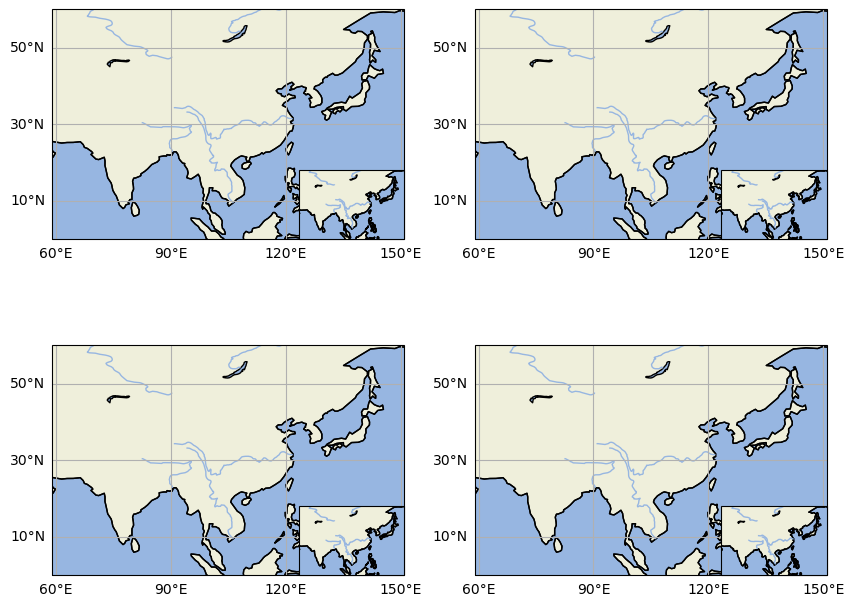

In [1]:
import matplotlib.pyplot as plt

import matplotlib.transforms as mtransforms

import cartopy.crs as ccrs

import cartopy.feature as cfeature

import numpy as np

def adjust_sub_axes(ax_main,ax_sub, shrink):
    '''   
    将ax_sub调整到ax_main的右下角.shrink指定缩小倍数。
    当ax_sub是GeoAxes时,需要在其设定好范围后再使用此函数
    '''
    bbox_main = ax_main.get_position()
    
    bbox_sub = ax_sub.get_position()
    
    ratio = bbox_main.width / bbox_sub.width
    
    wnew = bbox_sub.width* ratio * shrink
    
    hnew = bbox_sub.height*ratio* shrink
    
    bbox_new = mtransforms.Bbox.from_extents(
        
        bbox_main.x1 - wnew,bbox_main.y0,
        
        bbox_main.x1, bbox_main.y0 + hnew
    )
    ax_sub.set_position(bbox_new)
    
def map(ax):
    ax.coastlines()

    ax.add_feature(cfeature.OCEAN)
    
    ax.add_feature(cfeature.LAND, edgecolor='black')
    
    ax.add_feature(cfeature.LAKES, edgecolor='black')
    
    ax.add_feature(cfeature.RIVERS)
    
    
    return ax
### 设置投影、画板、子图个数、子图区域
proj = ccrs.PlateCarree()
fig   =   plt.figure(figsize=(10,8),dpi=100)
subplot_kw   =   {'projection': proj}                                     
axes_main = fig.subplots(2, 2, subplot_kw=subplot_kw)
axes_sub  = fig.subplots(2, 2, subplot_kw=subplot_kw)
box_main =[59,151, 0,60]
box_sub = [116,124,20,28]
### 循环绘制子图
for a_main,a_sub in zip(axes_main.flat, axes_sub.flat):
    ax1=a_main
    ax1=map(ax1)
    gl=ax1.gridlines(draw_labels=True, xlocs=[60,90,120,150],ylocs=[10,30,50])
    gl.xlabels_top = None
    gl.ylabels_right = False
    ax1.set_extent(box_main, crs=proj)
    #===================a_sub=================================================
    ax2=a_sub
    ax2=map(ax2)
    ax2.set_extent(box_main, crs=proj)
    adjust_sub_axes(a_main,a_sub,shrink=.3)
   
plt.show()